In [2]:
import numpy as np

In [4]:
import numpy as np
data = np.load('/home/bd2/ANATS/TrafficStream/data/SD/FastData/2017_30day.npz')
for key in data.keys():
    print(key)
    print('-'*100)

train_x
----------------------------------------------------------------------------------------------------
train_y
----------------------------------------------------------------------------------------------------
val_x
----------------------------------------------------------------------------------------------------
val_y
----------------------------------------------------------------------------------------------------
test_x
----------------------------------------------------------------------------------------------------
test_y
----------------------------------------------------------------------------------------------------
test_event
----------------------------------------------------------------------------------------------------
edge_index
----------------------------------------------------------------------------------------------------


In [5]:
import numpy as np
pred = np.load('./data/SD/FastData/test_results_2017.npz')['pred']
true = np.load('./data/SD/FastData/test_results_2017.npz')['truth']
mocopred = np.load('./data/SD/FastData/moco_test_results_2017.npz')['pred']
test_event = data['test_event'].transpose(0,2,1)

In [6]:
def reverse_sliding_window(data, window_size=12):
    """
    反滑动窗口函数，将(B,N,12)的数据转换为(N,T)
    
    Args:
        data: 输入数据，形状为(B, N, window_size)
        window_size: 窗口大小，默认为12
    
    Returns:
        output: 输出数据，形状为(N, T)，其中T = B + window_size - 1
    """
    B, N, W = data.shape
    assert W == window_size, f"Expected window size {window_size}, got {W}"
    
    # 计算输出的时间长度
    T = B + window_size - 1
    
    # 初始化输出数组
    output = np.zeros((N, T))
    count = np.zeros((N, T))  # 用于记录每个位置被累加的次数
    
    # 遍历每个batch
    for i in range(B):
        # 将第i个batch的数据放到对应的时间位置
        # data[i]的形状是(N, window_size)，直接使用即可
        output[:, i:i+window_size] += data[i]
        count[:, i:i+window_size] += 1
    
    # 对重叠的部分取平均
    output = output / count
    
    return output


In [7]:
pred = reverse_sliding_window(pred)
true = reverse_sliding_window(true)
moco_pred = reverse_sliding_window(mocopred)
event = reverse_sliding_window(test_event)
true.shape

(705, 21011)

In [9]:
node = 150
pred = np.load('./data/SD/FastData/test_results_2017.npz')['pred']
pred = reverse_sliding_window(pred)
import numpy as np
pred = pred[node,:][288*15:288*20]
pred[960:975] = 300 + np.random.randint(-20, 21, size=15)


In [24]:
int(365*0.8)+15

307

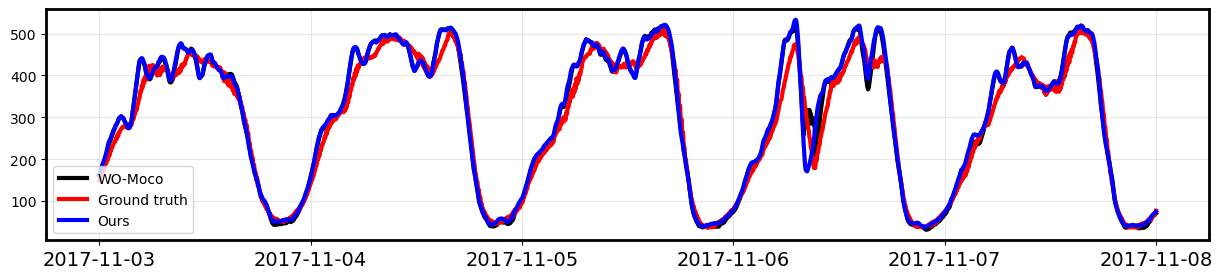

In [33]:
import matplotlib.pyplot as plt
import random
import numpy as np

node = random.randint(0, 700)
node = 150
plt.figure(figsize=(15, 3))
plt.plot(pred, label='WO-Moco', linewidth=3, color='black')
plt.plot(true[node,:][288*15:288*20], label='Ground truth', linewidth=3, color='red')

plt.plot(moco_pred[node,:][288*15:288*20], label='Ours', linewidth=3, color='blue')
# plt.plot((event[node,:][288*15:288*20]+1)*100, label='event', linewidth=3)

# plt.axvspan(288*8, 288*9, alpha=0.2, color='yellow', label='detailed analysis period')

# 设置x轴标签，将第307天到第312天转换为月份
# 2017年第307天 = 11月3日，第312天 = 11月8日
start_day = 307  # 2017年第307天
end_day = 312    # 2017年第312天
total_steps = len(pred)

# 创建x轴刻度和标签
x_ticks = np.linspace(0, total_steps-1, 6)  # 6个刻度点
x_labels = []

for i, tick in enumerate(x_ticks):
    day_offset = (tick / (total_steps-1)) * (end_day - start_day)
    current_day = start_day + day_offset
    
    # 2017年第307天是11月3日
    if current_day <= 307:
        x_labels.append('2017-11-03')
    elif current_day <= 308:
        x_labels.append('2017-11-04')
    elif current_day <= 309:
        x_labels.append('2017-11-05')
    elif current_day <= 310:
        x_labels.append('2017-11-06')
    elif current_day <= 311:
        x_labels.append('2017-11-07')
    else:
        x_labels.append('2017-11-08')

plt.xticks(x_ticks, x_labels, fontsize=14)
# plt.xlabel('Date (2017)', fontsize=16)
# plt.ylabel('Value', fontsize=16)
# plt.title(f'node {node} pred and true')
plt.legend()
plt.grid(True, alpha=0.3)

# 加粗边框
ax = plt.gca()
for spine in ax.spines.values():
    spine.set_linewidth(2)

plt.show()

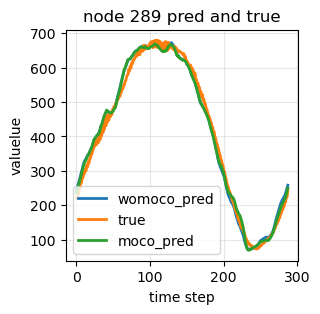

In [203]:
import matplotlib.pyplot as plt
node = random.randint(0, 700)
node = 289
plt.figure(figsize=(3, 3))
plt.plot(pred[node,:][288*8:288*9], label='womoco_pred', linewidth=2)
plt.plot(true[node,:][288*8:288*9], label='true', linewidth=2)
plt.plot(moco_pred[node,:][288*8:288*9], label='moco_pred', linewidth=2)
plt.xlabel('time step')
plt.ylabel('valuelue')
plt.title(f'node {node} pred and true')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()